In [1]:
!pip3 install transformers torch
import torch
import transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 27.4 MB/s eta 0:00:00


In [ ]:
!pip3 install praw 
import praw

# Authenticate with the Reddit API
reddit = praw.Reddit(client_id='client id',
                     client_secret='client secret',
                     user_agent='myBot/0.0.1')

# Search for and retrieve the top 10 posts from the "learnpython" subreddit
subreddit = reddit.subreddit('chatgpt')
top_posts = subreddit.top(limit=10000)
# Print the titles of the top 10 posts



with open("/content/drive/MyDrive/data.txt","w") as f :
    for post in top_posts:
        f.write(post.selftext)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 9.6 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [3]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Step 1: Load your dataset
train_file = "/content/drive/MyDrive/data.txt"
neo_tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
train_dataset = TextDataset(
    tokenizer=neo_tokenizer,
    file_path=train_file,
    block_size=128,
)

# Step 2: Define the data collator for language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=neo_tokenizer, mlm=False,
)

# Step 3: Load the pre-trained language model and set up the training arguments
neo_model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-125M")
training_args = TrainingArguments(
    output_dir="./output",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=100,
    save_total_limit=2,
    prediction_loss_only=True,
    learning_rate=5e-5,
)

# Step 4: Fine-tune the language model
neo_trainer = Trainer(
    model=neo_model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator,
)

neo_trainer.train()




/usr/local/lib/python3.9/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=234, training_loss=3.1253208258213143, metrics={'train_runtime': 79.3326, 'train_samples_per_second': 23.559, 'train_steps_per_second': 2.95, 'total_flos': 122049016233984.0, 'train_loss': 3.1253208258213143, 'epoch': 3.0})

In [4]:

# Step 2: Generate text completions for a partial sentence
input_text = "ChatGPT Today  "
input_ids = neo_tokenizer.encode(input_text, return_tensors='pt')
input_ids = input_ids.to(neo_model.device) # Move input_ids tensor to the same device as the model
output = neo_model.generate(input_ids, max_length=100, do_sample=True, top_k=50)
output_text = neo_tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ChatGPT Today  
3th Day: The Day After?

I have been making some great posts at this time. The only thing I will say is this: As you already know, ChatGPT is a free, OpenAI tool for learning GPT/PTG systems. It can't do anything if something goes wrong. It can generate new and innovative things at any moment. Although there are many things that it can do and some of those might not be as exciting


# LDA Analysis on text to extract topics  

In [ ]:
!pip3 install gensim torch transformers praw nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 8.1 MB/s eta 0:00:00


In [ ]:
import praw

# Authenticate with the Reddit API
reddit = praw.Reddit(client_id='client id',
                     client_secret='client secret',
                     user_agent='myBot/0.0.1')

# Search for and retrieve the top 10 posts from the "learnpython" subreddit
subreddit = reddit.subreddit('chatgpt')
top_posts = subreddit.top(limit=10000)
# Print the titles of the top 10 posts

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import gensim

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocess text data
preprocessed_texts = []
for post in top_posts:
    # Remove punctuation and convert to lowercase
    text = gensim.utils.simple_preprocess(post.selftext, deacc=True, min_len=2, max_len=15)
    # Remove stop words
    text = [word for word in text if word not in stop_words]
    preprocessed_texts.append(text)

# Convert preprocessed texts to bag-of-words format
vectorizer = CountVectorizer()
corpus = [' '.join(text) for text in preprocessed_texts]
bow_matrix = vectorizer.fit_transform(corpus)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is

In [ ]:
# Set number of topics
num_topics = 4

# Convert vocabulary dictionary to id2word dictionary
id2word = {v: k for k, v in vectorizer.vocabulary_.items()}

# Convert bag-of-words matrix to Gensim-compatible corpus format
corpus = gensim.matutils.Sparse2Corpus(bow_matrix)

# Fit LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    random_state=42,
    chunksize=100,
    passes=10,
    alpha='auto',
    eta='auto',
    per_word_topics=True
)


In [ ]:
# Print top words for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
for i, topic in enumerate(topics):
    print(f"Topic {i}:")
    for word, score in topic[1]:
        print(f"\t{word} ({score:.2f})")


Topic 0:
	additional (0.24)
	benchmark (0.14)
	across (0.12)
	clue (0.04)
	agent (0.03)
	award (0.03)
	compete (0.02)
	agitated (0.02)
	cheap (0.01)
	committing (0.01)
Topic 1:
	bentossell (0.06)
	audiobook (0.06)
	characters (0.05)
	adversarial (0.05)
	ce (0.05)
	castle (0.04)
	censorship (0.03)
	colleagues (0.03)
	blob (0.03)
	coder (0.03)
Topic 2:
	bucks (0.18)
	changing (0.17)
	allows (0.11)
	coming (0.10)
	bypasses (0.02)
	chadcode (0.01)
	broken (0.00)
	barrier (0.00)
	altogether (0.00)
	career (0.00)
Topic 3:
	choices (0.12)
	brilliance (0.10)
	breed (0.06)
	affect (0.06)
	animations (0.05)
	blank (0.03)
	answer (0.03)
	chance (0.03)
	asks (0.03)
	bonus (0.02)


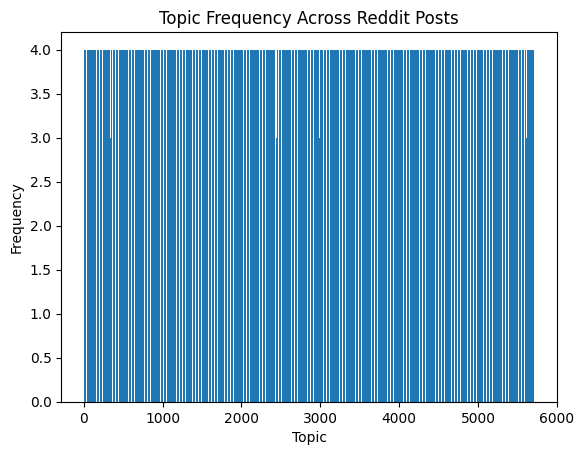

In [ ]:
import matplotlib.pyplot as plt

# Get topic frequencies across all posts
topic_freq = [sum(1 for _, topic_prob in lda_model.get_document_topics(doc)) for doc in corpus]

# Plot topic frequencies
plt.bar(range(len(topic_freq)), topic_freq)
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Frequency Across Reddit Posts')
plt.show()


Word cloud visualizatoin

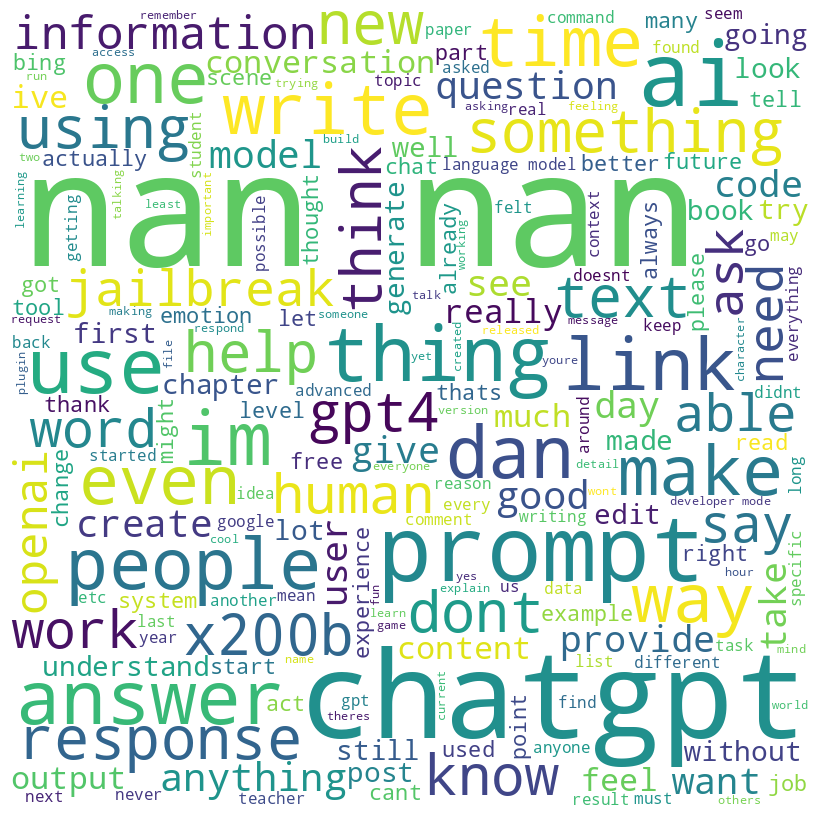

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Load the data into a pandas DataFrame
df = pd.read_csv("reddit_data.csv")
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove usernames
    text = re.sub(r"/?u/\S+", "", text)
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# Step 2: Preprocess the text data
df["post"] = df["post"].astype(str)
df["post"] = df["post"].apply(preprocess_text)

# Step 3: Create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(" ".join(df["post"]))

# Step 4: Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Network graph 

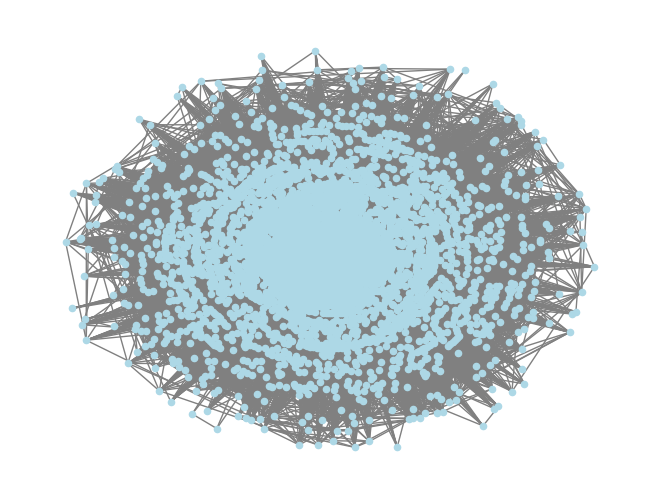

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 3: Compute the co-occurrence matrix
vectorizer = CountVectorizer(token_pattern=r"\b\w+\b")
X = vectorizer.fit_transform(df["post"])
co_occurrence = (X.T * X)

# Step 4: Create a network graph
G = nx.Graph()
# terms = vectorizer.vocabulary_.keys()
terms = list(vectorizer.vocabulary_.keys())

for i, j in zip(*co_occurrence.nonzero()):
    if i != j:
        G.add_edge(terms[i], terms[j], weight=co_occurrence[i, j])

# Step 5: Plot the network graph
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, node_color="lightblue", node_size=20, edge_color="gray", font_size=8, with_labels=False)
plt.show()




# Fine tune on reddits posts and likes as well 